<a href="https://colab.research.google.com/github/Jayjake1/MachineLearningProjects/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Almabetter/NYC Taxi Prediction/Copy of NYC Taxi Data.csv"
taxi_data=pd.read_csv(file_path,index_col='id')

In [ ]:
taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
taxi_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [ ]:
taxi_data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [ ]:
drop_off=taxi_data['dropoff_datetime']
drop_off.head()

id
id2875421    2016-03-14 17:32:30
id2377394    2016-06-12 00:54:38
id3858529    2016-01-19 12:10:48
id3504673    2016-04-06 19:39:40
id2181028    2016-03-26 13:38:10
Name: dropoff_datetime, dtype: object

In [ ]:
taxi_data.pickup_datetime = taxi_data.pickup_datetime.apply(pd.to_datetime) # converting object into datetime format

In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  object        
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [ ]:
taxi_data['pickup_datetime'].head()

id
id2875421   2016-03-14 17:24:55
id2377394   2016-06-12 00:43:35
id3858529   2016-01-19 11:35:24
id3504673   2016-04-06 19:32:31
id2181028   2016-03-26 13:30:55
Name: pickup_datetime, dtype: datetime64[ns]

In [ ]:
taxi_data[['dropoff_datetime']].head()
# df.assign(Date=df.Date.dt.date, Time=df.Date.dt.time)

,dropoff_datetime
id,
id2875421,2016-03-14 17:32:30
id2377394,2016-06-12 00:54:38
id3858529,2016-01-19 12:10:48
id3504673,2016-04-06 19:39:40
id2181028,2016-03-26 13:38:10


In [ ]:
dropoff_df=taxi_data[['dropoff_datetime']]
type(dropoff_df)

pandas.core.frame.DataFrame

In [ ]:
dropoff_df.dropoff_datetime = dropoff_df.dropoff_datetime.apply(pd.to_datetime)
dropoff_df.assign(Dropoff_Date=dropoff_df.dropoff_datetime.dt.date, dropoff_Time=dropoff_df.dropoff_datetime.dt.time)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,dropoff_datetime,Dropoff_Date,dropoff_Time
id,,,
id2875421,2016-03-14 17:32:30,2016-03-14,17:32:30
id2377394,2016-06-12 00:54:38,2016-06-12,00:54:38
id3858529,2016-01-19 12:10:48,2016-01-19,12:10:48
id3504673,2016-04-06 19:39:40,2016-04-06,19:39:40
id2181028,2016-03-26 13:38:10,2016-03-26,13:38:10
...,...,...,...
id2376096,2016-04-08 13:44:02,2016-04-08,13:44:02
id1049543,2016-01-10 07:46:10,2016-01-10,07:46:10
id2304944,2016-04-22 07:10:25,2016-04-22,07:10:25


In [ ]:
taxi_df.pickup_datetime = taxi_df.pickup_datetime.apply(pd.to_datetime)
taxi_df.assign(pickup_date=taxi_df.pickup_datetime.dt.date, pickup_Time=taxi_df.pickup_datetime.dt.time)

In [ ]:
new=taxi_data.loc[:,['pickup_datetime', 'dropoff_datetime']]
# taxi_data[['dropoff_datetime','pickup_datetime']]  # works same as above
new.reset_index()

,pickup_datetime,dropoff_datetime
id,,
id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30
id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38
id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48
id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40
id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10
...,...,...
id2376096,2016-04-08 13:31:04,2016-04-08 13:44:02
id1049543,2016-01-10 07:35:15,2016-01-10 07:46:10
id2304944,2016-04-22 06:57:41,2016-04-22 07:10:25


In [ ]:
sub_data = taxi_data.loc[:,['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]

In [ ]:
from sklearn.metrics.pairwise import haversine_distances

In [ ]:
# def haversine_dist(row):
#   dlat=np.radians(row.dropoff_lattitude - row.pickup_lattitude)
#   dlon=np.radians(row.dropoff_longitude - row.pickup_longitude)
#   r=6371 #in km
#   h=np.sin(dlat/2)**2+np.cos(np.radians(row.dropoff_lattitude))*np.cos(np.radians(row.pickup_lattitude))*(np.sin(dlon/2))**2
#   d=2*r*np.arcsin(np.sqrt(h)).astype('float')
#   return d

# sub_data['haver_distance'] = sub_data.apply(haversine_dist, axis = 'columns') 

In [ ]:
# start_point = [sub_data.pickup_latitude,sub_data.pickup_longitude]
# end_point = [sub_data.dropoff_latitude,sub_data.dropoff_longitude]
# dist_2=haversine_distances([start_point, end_point])

In [ ]:
sub_data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
id,,,,
id2875421,-73.982155,40.767937,-73.964630,40.765602
id2377394,-73.980415,40.738564,-73.999481,40.731152
id3858529,-73.979027,40.763939,-74.005333,40.710087
id3504673,-74.010040,40.719971,-74.012268,40.706718
id2181028,-73.973053,40.793209,-73.972923,40.782520


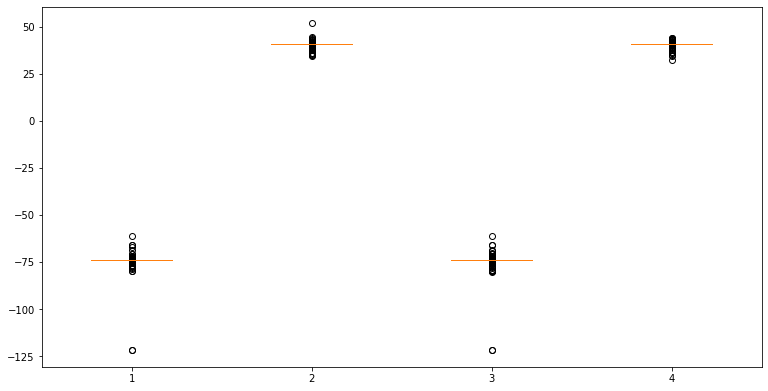

In [ ]:
dat = [sub_data.pickup_longitude,sub_data.pickup_latitude,sub_data.dropoff_longitude,sub_data.dropoff_latitude]
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(dat)
plt.show()